This notebook contains examples with data of how to use the plotting functions and what the results look like!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def position_map(data, arrows=False):
    
    '''
    this plots the results of the automated test run using the lower-right panel of runFinianGUI.py (the function run_test in the py file)
    as a scatterplot of every fiber tip location recorded in the test, connected in chronological order with black arrows, with data points resulting
    from CH1 triggers in blue and data points resulting from CH2 triggers in green; a dashed red circle is plotted to represent the positioner's
    range of motion, circle parameters were last updated 01/24/23 ;
    data should be the path to that file (a csv), as a string. by default that file is titled test_data
    '''
    
    #load data
    test_data = pd.read_csv(data)
    #slice by axis 
    ax1slice = test_data['Ax_input'] == 1.0
    ax2slice = test_data['Ax_input'] == 2.0
    ax1data = test_data[ax1slice]
    ax2data = test_data[ax2slice]
    
    #make figure
    xs = test_data['X_pix']
    ys = test_data['Y_pix']
    xs1 = ax1data['X_pix']
    ys1 = ax1data['Y_pix']
    xs2 = ax2data['X_pix']
    ys2 = ax2data['Y_pix']

    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111)
    #ax.scatter(xs, ys, c='k', alpha=1.)
    ax.scatter(xs1, ys1, c='b', alpha=0.5)
    ax.scatter(xs2, ys2, c='g', alpha=0.5)
    ax.set_xlim(1575., 1920.)
    ax.set_ylim(555., 900.)
    ax.set_xlabel('X_pix')
    ax.set_ylabel('Y_pix')

    ##ROTATE DATA:
    xs2p = ys2
    ys2p = -1*xs2
    m2p, b2p = np.polyfit(xs2p, ys2p, 1)
    m2pr = -1./m2p
    b2pr = -b2p/m2p
    print(m2pr)
    print(b2pr)

    m1, b1 = np.polyfit(xs1, ys1, 1)
    print("SLOPE1: ", m1)
    fit1 = plt.plot(xs1, m1*xs1 + b1, c='r', ls='-.', lw=0.5) 
    
    ##ARROWS BOOLEAN
    if arrows==True:
        for i in range(len(xs)-1):
            ax.arrow(xs[i], ys[i], (xs[i+1]-xs[i]), (ys[i+1]-ys[i]), width=0.5e-4, color='k', head_width=1.2, alpha=0.5, 
                     length_includes_head=True, head_starts_at_zero=True)


    circ_1 = plt.Circle((1739,720), 158, color='r', lw=1.5, ls='-.', fill=False)
    ax.add_artist(circ_1)

    m2, b2 = np.polyfit(xs2, ys2, 1)
    print("SLOPE2: ", m2)
    fit2 = plt.plot(xs2, m2*xs2 + b2, c='r', ls='-.', lw=0.5)

    theta1 = np.rad2deg(np.arctan(m1))
    theta2 = np.rad2deg(np.arctan(m2))

    #plt.savefig('fig_name.png')

    print('angle1: ', theta1, ' angle2: ', theta2, ' orthogonality: ', (abs(theta1)+abs(theta2))) 
    
    
    
def chrono_pix(data):
    '''
    this plots the results of the automated test run using the lower-right panel of runFinianGUI.py (the function run_test in the py file)
    as 4 subplots showing the change in X and Y pixel coordinates during the CH1 and CH2 tests ; data should be the path to that file (a csv), 
    as a string. by default that file is titled test_data
    '''

    #load data
    test_data = pd.read_csv(data)
    #slice by axis 
    ax1slice = test_data['Ax_input'] == 1.0
    ax2slice = test_data['Ax_input'] == 2.0
    ax1data = test_data[ax1slice]
    ax2data = test_data[ax2slice]
    
    #make figures
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (16,10))
    
    ax1.plot(ax1data['X_pix'], label='CH1 X')
    ax1.set_xlabel('trigger #')
    ax1.set_ylabel('X_pix')
    ax1.set_title('CH1 X_pix')
    ax1.legend(loc='upper left')
    
    ax2.plot(ax1data['Y_pix'], label='CH1 Y')
    ax2.set_xlabel('trigger #')
    ax2.set_ylabel('Y_pix')
    ax2.set_title('CH1 Y_pix')
    ax2.legend(loc='upper left')
    
    ax3.plot(ax2data['X_pix'], label='CH2 X')
    ax3.set_xlabel('trigger #')
    ax3.set_ylabel('X_pix')
    ax3.set_title('CH2 X_pix')
    ax3.legend(loc='upper left')
    
    ax4.plot(ax2data['Y_pix'], label='CH2 Y')
    ax4.set_xlabel('trigger #')
    ax4.set_ylabel('Y_pix')
    ax4.set_title('CH2 Y_pix')
    ax4.legend(loc='upper left')  
    

def volt_disp_linear2(data):
    '''
    this plots the results of the automated test run using the lower-right panel of runFinianGUI.py (the function run_test in the py file)
    as 2 subplots showing linear fits of the displacement per voltage during the CH1 and CH2 tests ; data should be the path to that file (a csv), 
    as a string. by default that file is titled test_data
    '''
    data = pd.read_csv(data)
    #used to be separate displacement function
    data.assign(dx=0.0)
    data.assign(dy=0.0)
    data.assign(disp=0.0)

    xs = list(data['X_pix'])
    ys = list(data['Y_pix'])

    for i in range(len(data)):
        if i > 0:
            argx = xs[i] - xs[i-1]
            argy = ys[i] - ys[i-1]
            data.loc[i, 'dx'] = argx
            data.loc[i, 'dy'] = argy
            disp = (argx**2 + argy**2)**(1/2)
            data.loc[i, 'disp'] = disp
         
    # slice by axis
    ax1slice = data['Ax_input'] == 1.0
    ax2slice = data['Ax_input'] == 2.0
    ax1data = data[ax1slice]
    ax2data = data[ax2slice]
    
    #plotting
    fig, (ax1, ax2) = plt.subplots(1,2,figsize = (16,8))
    volts1 = ax1data['V_input']
    disps1 = ax1data['disp']
    steps1 = ax1data['Steps_input'].mean()
    
    volts2 = ax2data['V_input']
    disps2 = ax2data['disp']
    steps2 = ax2data['Steps_input'].mean()   
    
    print("STEPS1: ", steps1)
    print("STEPS2: ", steps2)
    
    ax1.scatter(volts1, disps1, alpha=0.7, s=90.)
    ax1.set_xlabel('voltage input')
    ax1.set_ylabel('displacement (pixels)')
    ax1.set_title('CH1 DATA')
    m1, b1 = np.polyfit(volts1, disps1, 1)
    move1 = m1 / steps1
    print("SLOPE1: ", m1)
    print(move1, " PIXELS/VOLT/STEP CH1")
    fit1 = ax1.plot(volts1, m1*volts1 + b1, c='r', ls='-.', lw=1.5) 
    
    ax2.scatter(volts2, disps2, alpha=0.7, s=90.)
    ax2.set_xlabel('voltage input')
    ax2.set_ylabel('displacement (pixels)')
    ax2.set_title('CH2 DATA')
    m2, b2 = np.polyfit(volts2, disps2, 1)
    move2 = m2 / steps2
    print("SLOPE2: ", m2)
    print(move2, " PIXELS/VOLT/STEP CH2")
    fit2 = ax2.plot(volts2, m2*volts2 + b2, c='r', ls='-.', lw=1.5)

Now that our functions are defined, let's see what they do! The input to these functions is always the same, the string representing the path to the data file output by the automated test run by runFinianGUI.py. Some of them have optional additional arguments, for things like turning the arrows in the plots on and off.
The data used will be test_data_0113.csv, available in this directory.

First, we'll test position_map. This plots each recorded pixel coordinate throughout the test. Data from triggers to CH1 are plotted in blue, while data from triggers to CH2 are plotted in green. The range of motion is plotted as a dotted red circle, and if arrows=True, black arrows are plotted to illustrate the chronological serie

1.8265603454397952
-2470.1868904852445
SLOPE1:  -0.3595055590545279
SLOPE2:  1.745804657922309
angle1:  -19.773793278798934  angle2:  60.19584227044221  orthogonality:  79.96963554924115


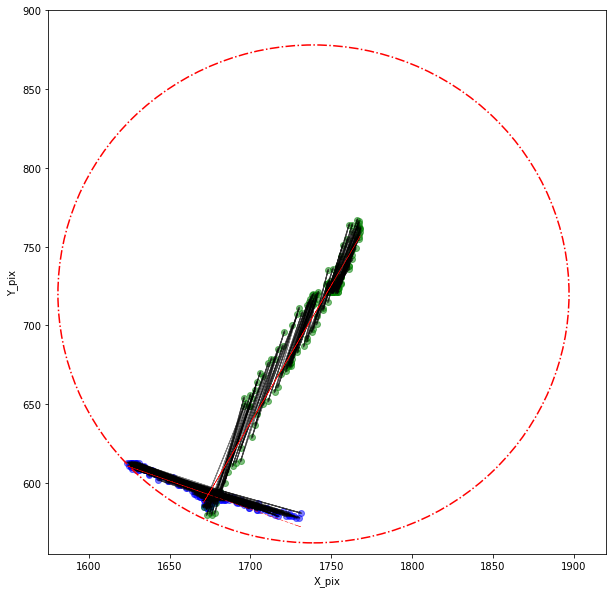

In [7]:
position_map('test_data_0113.csv', arrows=True)

Next we'll use chrono_pix. This function is useful for visualizing the overall consistency of motion throughout the test for each channel, and any drift in position that accumulates throughout the test. Since the voltage is incrementally increasing after a set number of triggers (determined by the test inputs), we expect the result to widen as higher trigger numbers in the trial are reached. Because a negative trigger of the same magnitude always follows a positive trigger, we expect either the upper or lower envelope of the function (depending on the alignment between the "positive" direction of the waveform generator with the positive direction in pixel coordinates) to be a constant pixel value. In the results below from a test run on 01/13/23, we can see CH1 has very consistent motion between consecutive triggers, but that an overall drift in coordinates builds up throughout the test. This is in contrast with the results from CH2, where even after only a few triggers the drift may be greater than the width of the function, and by the last 50+ triggers of the CH2 test the locations never approach the starting location.

It is important to remember that in addition to drift, the positioner running against the edge of its range of motion can impact the results. Whether this occurred can be determined using position_map.

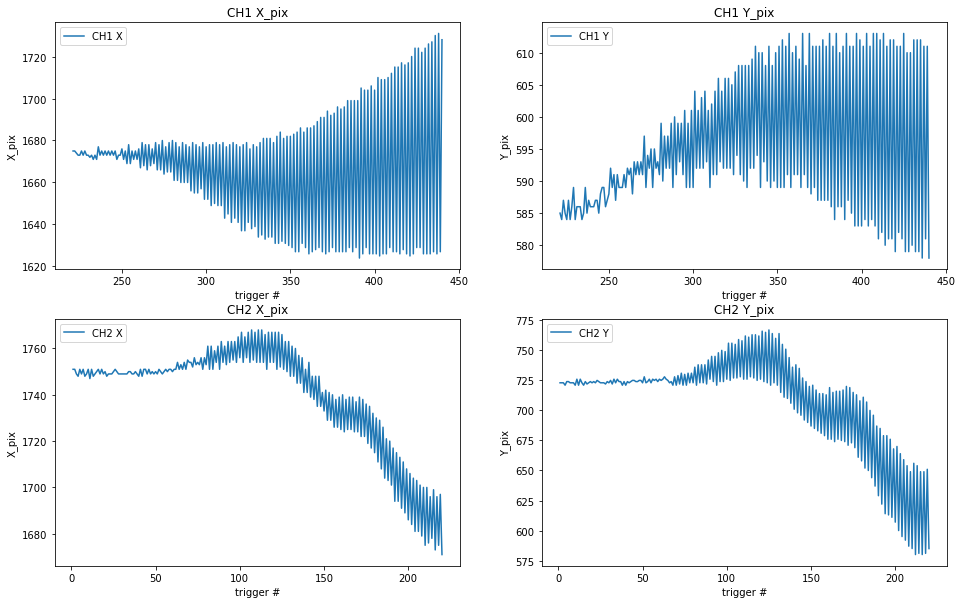

In [8]:
chrono_pix('test_data_0113.csv')

Next, we'll use volt_disp_linear2. This function plots each data point's displacement from the prior location, from the CH1 and CH2 trials, by input voltage to the waveform generator. The number of steps (waveform cycles) is reported, along with the slopes on the graphs, and the displacement in pixels per input volt per step for each channel. This plot is useful for visualizing the scatter in each channel's data, and locating the minimum input voltage required to get a consistent motion. Be mindful of the different y-axis scalings!

STEPS1:  10.0
STEPS2:  10.0
SLOPE1:  52.74381243784496
5.274381243784496  PIXELS/VOLT/STEP CH1
SLOPE2:  36.047229816706746
3.6047229816706747  PIXELS/VOLT/STEP CH2


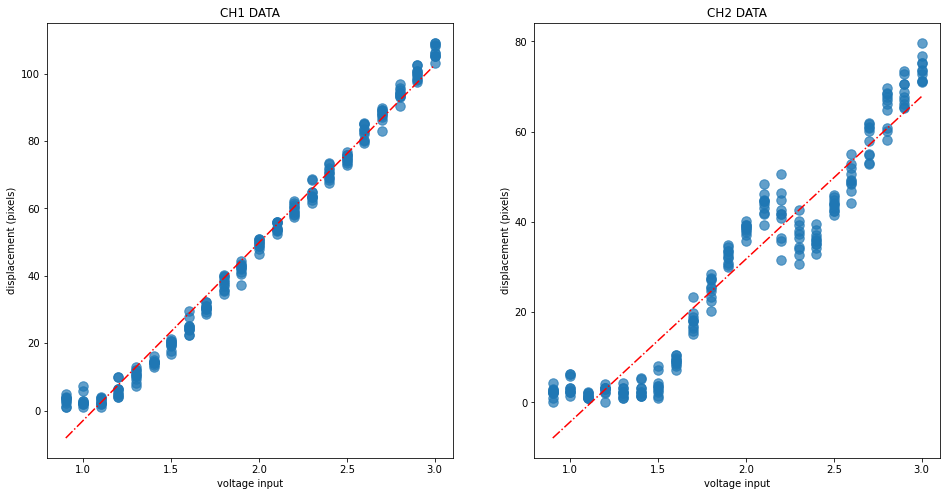

In [10]:
volt_disp_linear2('test_data_0113.csv')